![alt text](um6p.png)

***Abderahmane HAMDOUCHI***



**Master SDAD**

**UM6P**

\newpage

\tableofcontents 

\newpage

# Objectif du Tp

Ce tp a pour objectif de se familiariser avec le framework surprise en implémentant les différentes algorithmes et de faire un rinking pour savoir le meilleur algorithme qui marche  bien avec notre DataSet.
En outre d'appliquer GridSearch pour faire tourner les différentes  hyper paramètres sur KNNBasic avec avoir les paramètres avec le meilleur score. 
En fin ploter le différents algorithmes en fonction de RMSE et MAE, d'ou on a eu que SVDpp suivi par KNNBaseline

\newpage

In [ ]:
import numpy

> site officiel: http://surpriselib.com/

> installer surprise:

conda install -c conda-forge scikit-surprise

In [34]:
from surprise import SVD, KNNBasic , KNNWithMeans , KNNWithZScore , NMF , SlopeOne ,CoClustering,KNNBaseline
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV

In [6]:
data = Dataset.load_builtin('ml-100k', prompt = False)

In [45]:

# Utilisons SVD vu dans le cours.
algo = SVD()
#  5-fold cross-validation en affichant les résultats  
SVD_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9341  0.9380  0.9288  0.9410  0.9373  0.9358  0.0042  
MAE (testset)     0.7384  0.7414  0.7309  0.7424  0.7375  0.7381  0.0040  
Fit time          5.07    4.84    5.22    5.02    5.00    5.03    0.12    
Test time         0.24    0.15    0.19    0.13    0.19    0.18    0.04    


In [8]:
#Changer le code pour prendre en considération l'items 

In [9]:
# Utilisons le KNN 
algo = KNNBasic()

#  5-fold cross-validation en affichant les résultats 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9781  0.9828  0.9831  0.9723  0.9790  0.9791  0.0039  
MAE (testset)     0.7732  0.7763  0.7784  0.7676  0.7708  0.7733  0.0039  
Fit time          0.50    0.53    0.51    0.54    0.52    0.52    0.01    
Test time         3.51    3.43    3.28    3.44    3.58    3.45    0.10    


{'test_rmse': array([0.97811931, 0.98282118, 0.98313484, 0.97226562, 0.97898063]),
 'test_mae': array([0.77321779, 0.77632643, 0.77844221, 0.76757816, 0.77081038]),
 'fit_time': (0.5035266876220703,
  0.5259912014007568,
  0.5091354846954346,
  0.5377652645111084,
  0.5160431861877441),
 'test_time': (3.5130574703216553,
  3.4312591552734375,
  3.2798454761505127,
  3.444450616836548,
  3.579254150390625)}

In [10]:
print(data)

# Le meilleur algorithme avec les différents paramètres qu'on peut retenir 

## Définir le Modèle avec les hyperparamètre et les faire entrer dans la GridSearch

Dans cette partie on va  appliquer les hyper-parameters sur l'algorithme KNNBAsic afin de ressortir le meilleur algorithme avec les différentes paramètres possible afin de retenir le meilleur score avec les meilleur paramètre possible.

In [ ]:
import numpy as np
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
K = np.arange(38,45)
name= ['cosine','pearson_baseline','pearson']
user_based= [False,True]
shrinkage= [0,1,2,3,4]

print("*********")

param_grid = {'K': K, 'name':name,'user_based':user_based,'shrinkage':shrinkage }
svd = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs = -1)

svd.fit(data)



*********
RMSE score 0.9790887683439733
Best Parameters {'K': 38, 'name': 'cosine', 'user_based': False, 'shrinkage': 0}


Alors le meilleur K est 38 avec une mesure de distance cosine et user_based : False shrinkage = 0

In [47]:
# Utilisons KNNBasic.
algo = KNNBasic(K= 38, name= 'cosine', user_based= False, shrinkage= 0)

#  5-fold cross-validation en affichant les résultats 
KNNBasic_with_best_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9800  0.9797  0.9876  0.9778  0.9694  0.9789  0.0058  
MAE (testset)     0.7750  0.7755  0.7791  0.7733  0.7652  0.7736  0.0046  
Fit time          0.51    0.54    0.54    0.55    0.53    0.53    0.01    
Test time         3.49    3.82    3.56    3.61    3.58    3.61    0.11    


### SVD semble être plus précis que KNNBasic, mais cela semble prendre plus de temps.

In [26]:
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate



# Utilisons SVD++.
algo = SVDpp()

#  5-fold cross-validation en affichant les résultats 
SVDpp_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9202  0.9165  0.9244  0.9144  0.9215  0.9194  0.0036  
MAE (testset)     0.7200  0.7204  0.7217  0.7190  0.7235  0.7209  0.0015  
Fit time          195.91  236.92  202.04  208.27  209.43  210.51  14.06   
Test time         3.93    4.00    4.04    5.41    3.23    4.12    0.71    


### SVD ++ prend beaucoup plus de temps.

In [27]:
from surprise import BaselineOnly
print('Using ALS')
bsl_options = {'method': 'sgd',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
BaselineOnly_cv=cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


> Question: Changer la paramètre method en remplaçant sgd par als. Est-ce que le rmse s'améliore ?

> TAF

regarder la documentation officielle: https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html
Implémenter les Algorithmes suivant: 

1. NormalPredictor


3. k-NN algorithms

    KNNBasic


    KNNWithMeans


   KNNWithZScore


   KNNBaseline


4. Matrix Factorization-based algorithms



    NMF


5. Slope One


6. Co-clustering



## Application des différentes algorithmes



   ### NormalPredictor


In [28]:

from surprise.prediction_algorithms.random_pred import NormalPredictor



# Utilisons NormalPredictor.
algo = NormalPredictor()

#  5-fold cross-validation en affichant les résultats 
normalPredictor_CV=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5236  1.5144  1.5179  1.5274  1.5206  1.5208  0.0045  
MAE (testset)     1.2237  1.2144  1.2238  1.2295  1.2218  1.2226  0.0049  
Fit time          0.14    0.14    0.14    0.15    0.16    0.15    0.01    
Test time         0.13    0.17    0.17    0.10    0.13    0.14    0.03    


In [29]:
import numpy as np
np.mean(normalPredictor_CV['test_mae'])

1.2226493370428106

In [30]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9418  0.9484  0.9376  0.9369  0.9403  0.9410  0.0041  
MAE (testset)     0.7452  0.7526  0.7401  0.7440  0.7434  0.7451  0.0041  
Fit time          0.13    0.15    0.15    0.16    0.16    0.15    0.01    
Test time         0.08    0.15    0.10    0.10    0.11    0.11    0.02    


{'test_rmse': array([0.94183646, 0.94835739, 0.93761953, 0.93694232, 0.94032464]),
 'test_mae': array([0.74519383, 0.7526101 , 0.74014318, 0.74396807, 0.74343926]),
 'fit_time': (0.12647366523742676,
  0.15099763870239258,
  0.15095186233520508,
  0.16000032424926758,
  0.16199827194213867),
 'test_time': (0.0770416259765625,
  0.1509993076324463,
  0.09754729270935059,
  0.09599637985229492,
  0.10699939727783203)}

### KNNWithMeans()

In [31]:

# Utilisons KNNWithMeans.
algo = KNNWithMeans()

#  5-fold cross-validation en affichant les résultats 
KNNWithMeans_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9450  0.9596  0.9476  0.9489  0.9529  0.9508  0.0051  
MAE (testset)     0.7443  0.7556  0.7452  0.7486  0.7522  0.7491  0.0043  
Fit time          0.57    0.55    0.55    0.58    0.60    0.57    0.02    
Test time         3.72    3.76    4.04    3.84    4.21    3.91    0.18    


### KNNWithZScore


In [32]:
algo = KNNWithZScore()

#  5-fold cross-validation en affichant les résultats 
KNNWithZScore_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9530  0.9375  0.9602  0.9507  0.9493  0.9501  0.0074  
MAE (testset)     0.7483  0.7354  0.7537  0.7460  0.7444  0.7456  0.0060  
Fit time          0.68    0.65    0.60    0.59    0.62    0.63    0.03    
Test time         4.17    4.07    4.05    4.08    3.73    4.02    0.15    


### KNNBaseline


In [35]:
algo = KNNBaseline()

#  5-fold cross-validation en affichant les résultats 
KNNBaseline_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9302  0.9253  0.9326  0.9308  0.9348  0.9307  0.0032  
MAE (testset)     0.7333  0.7297  0.7343  0.7318  0.7374  0.7333  0.0026  
Fit time          0.96    0.90    0.86    0.93    0.83    0.90    0.05    
Test time         4.50    4.43    4.28    4.35    4.53    4.42    0.09    


## Matrix Factorization-based algorithms

### NMF

In [36]:
algo = NMF()

#  5-fold cross-validation en affichant les résultats 
NMF_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9698  0.9603  0.9655  0.9593  0.9630  0.9636  0.0038  
MAE (testset)     0.7619  0.7527  0.7594  0.7549  0.7583  0.7575  0.0033  
Fit time          5.10    5.25    5.20    5.19    5.49    5.25    0.13    
Test time         0.13    0.16    0.12    0.10    0.12    0.13    0.02    


 ## SlopeOne ,

In [37]:
algo = SlopeOne()

#  5-fold cross-validation en affichant les résultats 
SlopeOne_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9519  0.9380  0.9327  0.9474  0.9483  0.9437  0.0072  
MAE (testset)     0.7504  0.7368  0.7330  0.7453  0.7439  0.7419  0.0062  
Fit time          0.74    0.87    0.77    0.77    0.74    0.78    0.05    
Test time         3.27    2.87    3.30    3.04    2.96    3.09    0.17    


## CoClustering

In [38]:
algo = CoClustering()

#  5-fold cross-validation en affichant les résultats 
CoClustering_cv=cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9689  0.9720  0.9660  0.9600  0.9526  0.9639  0.0069  
MAE (testset)     0.7587  0.7625  0.7570  0.7516  0.7441  0.7548  0.0064  
Fit time          2.85    2.29    2.33    2.38    2.37    2.44    0.20    
Test time         0.10    0.15    0.09    0.09    0.09    0.11    0.02    


In [43]:
np.mean(CoClustering_cv['test_rmse'])

0.9638992856842717

Regroupper les différentes resultats pour mieux interpreter les scores 

In [50]:
import pandas as pd
surprise_results = {'normalPredictor': [np.mean(normalPredictor_CV['test_rmse']), np.mean(normalPredictor_CV['test_mae'])], 'SVDpp': [np.mean(SVDpp_cv['test_rmse']), np.mean(SVDpp_cv['test_mae'])],\
                    'NMF': [np.mean(NMF_cv['test_rmse']), np.mean(NMF_cv['test_mae'])], 'CoClustering': [np.mean(CoClustering_cv['test_rmse']), np.mean(CoClustering_cv['test_mae'])],\
                    'SlopeOne': [np.mean(SlopeOne_cv['test_rmse']), np.mean(SlopeOne_cv['test_mae'])], 'KNNBaseline': [np.mean(KNNBaseline_cv['test_rmse']), np.mean(KNNBaseline_cv['test_mae'])],\
                    'KNNWithZScore': [np.mean(KNNWithZScore_cv['test_rmse']), np.mean(KNNWithZScore_cv['test_mae'])], 'KNNWithMeans': [np.mean(KNNWithMeans_cv['test_rmse']), np.mean(KNNWithMeans_cv['test_mae'])]
                    ,'SVD': [np.mean(SVD_cv['test_rmse']), np.mean(SVD_cv['test_mae'])],'KNNBasic_with_best': [np.mean(KNNBasic_with_best_cv['test_rmse']), np.mean(KNNBasic_with_best_cv['test_mae'])]}
surprise_results = pd.DataFrame(surprise_results, index=['RMSE', 'MAE']).T
surprise_results

,RMSE,MAE
normalPredictor,1.520786,1.222649
SVDpp,0.919415,0.720918
NMF,0.963566,0.757460
CoClustering,0.963899,0.754804
SlopeOne,0.943689,0.741874
KNNBaseline,0.930739,0.733327
KNNWithZScore,0.950129,0.745562
KNNWithMeans,0.950790,0.749149
SVD,0.935832,0.738119
KNNBasic_with_best,0.978902,0.773615


In [62]:
surprise_results=surprise_results.sort_values('RMSE')
surprise_results_mae=surprise_results.sort_values('MAE')

In [61]:
surprise_results_rmse

,RMSE,MAE
SVDpp,0.919415,0.720918
KNNBaseline,0.930739,0.733327
SVD,0.935832,0.738119
SlopeOne,0.943689,0.741874
KNNWithZScore,0.950129,0.745562
KNNWithMeans,0.950790,0.749149
NMF,0.963566,0.757460
CoClustering,0.963899,0.754804
KNNBasic_with_best,0.978902,0.773615
normalPredictor,1.520786,1.222649


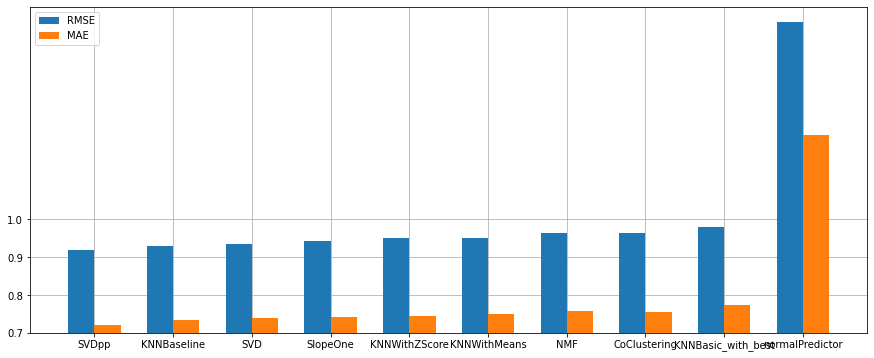

In [64]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))
ax = plt.subplot(111)
ax.set_axisbelow(True)
plt.bar(np.arange(1, 3*surprise_results.shape[0], 3), surprise_results['RMSE']-0.7, width=1, label='RMSE')
plt.bar(np.arange(2, 3*surprise_results.shape[0], 3), surprise_results['MAE']-0.7, width=1, label='MAE')
plt.xticks(np.arange(1.5, 3*surprise_results.shape[0], 3), surprise_results.index)
plt.yticks(np.arange(0, 0.4, 0.1), [0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.legend()
plt.show()

Alors le meilleur algorithme  SVDpp suivi par KNNBaseline